In [3]:
import pandas as pd

# Load system logs data
df = pd.read_excel("system_logs.xecel.xlsx")

# Show first few rows
df.head()

,timestamp,user,ip_address,action,status
0,2025-07-11 10:02:01,admin,192.168.1.10,login_attempt,failed
1,2025-07-11 10:02:05,admin,192.168.1.10,login_attempt,failed
2,2025-07-11 10:02:10,admin,192.168.1.10,login_attempt,success
3,2025-07-11 10:05:00,guest,192.168.1.12,file_access,success
4,2025-07-11 10:06:30,guest,192.168.1.12,file_access,success


In [9]:
df.columns.tolist()

['timestamp', 'user', 'ip_address', 'action', 'status']

In [12]:
# Create 'Is_Threat' column based on simple keyword rules
df['Is_Threat'] = df.apply(lambda row: 1 if (
    ('fail' in str(row['status']).lower()) or 
    ('denied' in str(row['status']).lower())
) else 0, axis=1)

# Preview the first few rows
df[['action', 'status', 'Is_Threat']].head(10)


,action,status,Is_Threat
0,login_attempt,failed,1
1,login_attempt,failed,1
2,login_attempt,success,0
3,file_access,success,0
4,file_access,success,0
5,login_attempt,failed,1
6,login_attempt,failed,1
7,login_attempt,failed,1
8,file_access,success,0


In [13]:
# Count how many rows are threats vs non-threats
df['Is_Threat'].value_counts()


Is_Threat
1    5
0    4
Name: count, dtype: int64

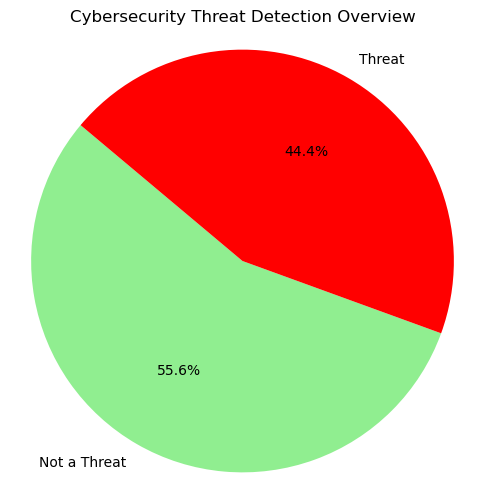

In [14]:
import matplotlib.pyplot as plt

# Count threat vs non-threat
threat_counts = df['Is_Threat'].value_counts()

# Plot
labels = ['Not a Threat', 'Threat']
colors = ['lightgreen', 'red']

plt.figure(figsize=(6, 6))
plt.pie(threat_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Cybersecurity Threat Detection Overview')
plt.axis('equal')
plt.show()


In [15]:
df.to_excel("cyber_threats_detected.xlsx", index=False)
